In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import operator
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from scipy.stats import chi2_contingency, ttest_ind
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score, precision_score,recall_score,confusion_matrix,plot_confusion_matrix
from sklearn import model_selection, metrics

C:\Users\91966\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\91966\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
train = pd.read_excel('C:/Users/91966/Desktop/Backup/PGP DSE/Capstone/Group 5/census-income-data.xlsx')
test  = pd.read_excel('C:/Users/91966/Desktop/Backup/PGP DSE/Capstone/Group 5/census-income-test.xlsx')

In [3]:
pd.options.display.max_columns= None
pd.options.display.max_rows= None

In [4]:
train.head()

,Age,Worker_Class,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weigh,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,Income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [5]:
train.shape, test.shape

((199523, 42), (99762, 42))

In [6]:
train.describe()

,Age,detailed industry recode,detailed occupation recode,wage per hour,capital gains,capital losses,dividends from stocks,instance weigh,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
Age                                           199523 non-null int64
Worker_Class                                  199523 non-null object
detailed industry recode                      199523 non-null int64
detailed occupation recode                    199523 non-null int64
education                                     199523 non-null object
wage per hour                                 199523 non-null int64
enroll in edu inst last wk                    199523 non-null object
marital stat                                  199523 non-null object
major industry code                           199523 non-null object
major occupation code                         199523 non-null object
race                                          199523 non-null object
hispanic origin                               199523 non-null object
sex                                           199523 non-null obj

In [8]:
train['Income'].value_counts(normalize=True)*100

-50000      93.794199
 50000+.     6.205801
Name: Income, dtype: float64

In [9]:
train.isnull().sum()

Age                                           0
Worker_Class                                  0
detailed industry recode                      0
detailed occupation recode                    0
education                                     0
wage per hour                                 0
enroll in edu inst last wk                    0
marital stat                                  0
major industry code                           0
major occupation code                         0
race                                          0
hispanic origin                               0
sex                                           0
member of a labor union                       0
reason for unemployment                       0
full or part time employment stat             0
capital gains                                 0
capital losses                                0
dividends from stocks                         0
tax filer stat                                0
region of previous residence            

In [10]:
train_copy = train.copy()
test_copy  = test.copy()

In [11]:
train['Income']= train['Income'].replace({-50000:0,' 50000+.':1})
test['Income'] = test['Income'].replace({-50000:0, ' 50000+.':1})

### Understanding the data 

In [12]:
train.groupby(['education', 'Income'])['Income'].count() 
#only children has no 50000+, so cant merge any class in education field

education                                Income
 10th grade                              0          7495
                                         1            62
 11th grade                              0          6806
                                         1            70
 12th grade no diploma                   0          2092
                                         1            34
 1st 2nd 3rd or 4th grade                0          1786
                                         1            13
 5th or 6th grade                        0          3255
                                         1            22
 7th and 8th grade                       0          7935
                                         1            72
 9th grade                               0          6192
                                         1            38
 Associates degree-academic program      0          3951
                                         1           412
 Associates degree-occup /vocational    

In [13]:
train.groupby(['Worker_Class', 'Income'])['Income'].count()

Worker_Class                     Income
 Federal government              0          2328
                                 1           597
 Local government                0          6937
                                 1           847
 Never worked                    0           437
                                 1             2
 Not in universe                 0         99341
                                 1           904
 Private                         0         64706
                                 1          7322
 Self-employed-incorporated      0          2131
                                 1          1134
 Self-employed-not incorporated  0          7355
                                 1          1090
 State government                0          3742
                                 1           485
 Without pay                     0           164
                                 1             1
Name: Income, dtype: int64

In [14]:
train.groupby(['migration code-change in msa', 'Income'])['Income'].count()
# '?' needs to be treated

migration code-change in msa  Income
 ?                            0         93153
                              1          6543
 Abroad to MSA                0           435
                              1            18
 Abroad to nonMSA             0            73
 MSA to MSA                   0         10119
                              1           482
 MSA to nonMSA                0           766
                              1            24
 NonMSA to MSA                0           588
                              1            27
 NonMSA to nonMSA             0          2761
                              1            50
 Nonmover                     0         77317
                              1          5221
 Not identifiable             0           413
                              1            17
 Not in universe              0          1516
Name: Income, dtype: int64

In [15]:
train['state of previous residence'].value_counts()

 Not in universe         183750
 California                1714
 Utah                      1063
 Florida                    849
 North Carolina             812
 ?                          708
 Abroad                     671
 Oklahoma                   626
 Minnesota                  576
 Indiana                    533
 North Dakota               499
 New Mexico                 463
 Michigan                   441
 Alaska                     290
 Kentucky                   244
 Arizona                    243
 New Hampshire              242
 Wyoming                    241
 Colorado                   239
 Oregon                     236
 West Virginia              231
 Georgia                    227
 Montana                    226
 Alabama                    216
 Ohio                       211
 Texas                      209
 Arkansas                   205
 Mississippi                204
 Tennessee                  202
 Pennsylvania               199
 New York                   195
 Louisia

In [16]:
train[train['migration code-change in msa'] ==' Nonmover'].groupby('state of previous residence')['state of previous residence'].count()

state of previous residence
 Not in universe    82538
Name: state of previous residence, dtype: int64

In [17]:
train.groupby(['Worker_Class', 'education', 'Income'])['Income'].count().unstack()

Income                                                                         0  \
Worker_Class                    education                                          
 Federal government              10th grade                                 32.0   
                                 11th grade                                 35.0   
                                 12th grade no diploma                      12.0   
                                 1st 2nd 3rd or 4th grade                    1.0   
                                 5th or 6th grade                            8.0   
                                 7th and 8th grade                          17.0   
                                 9th grade                                  13.0   
                                 Associates degree-academic program        134.0   
                                 Associates degree-occup /vocational       113.0   
                                 Bachelors degree(BA AB BS)                394.0   
                                 Doctorate degree(PhD EdD)                  11.0   
                                 High school graduate                      776.0   
                                 Masters degree(MA MS MEng MEd MSW MBA)    113.0   
                                 Prof school degree (MD DDS DVM LLB JD)     24.0   
                                 Some college but no degree                645.0   
 Local government                10th grade                                139.0   
                                 11th grade                                161.0   
                                 12th grade no diploma                      46.0   
                                 1st 2nd 3rd or 4th grade                   22.0   
                                 5th or 6th grade                           25.0   
                                 7th and 8th grade                          99.0   
                                 9th grade                                  91.0   
                                 Associates degree-academic program        261.0   
                                 Associates degree-occup /vocational       296.0   
                                 Bachelors degree(BA AB BS)               1717.0   
                                 Doctorate degree(PhD EdD)                  34.0   
                                 High school graduate                     1818.0   
                                 Less than 1st grade                         5.0   
                                 Masters degree(MA MS MEng MEd MSW MBA)    954.0   
                                 Prof school degree (MD DDS DVM LLB JD)     50.0   
                                 Some college but no degree               1219.0   
 Never worked                    10th grade                                 89.0   
                                 11th grade                                 68.0   
                                 12th grade no diploma                      14.0   
                                 1st 2nd 3rd or 4th grade                    4.0   
                                 5th or 6th grade                            3.0   
                                 7th and 8th grade                          48.0   
                                 9th grade                                 108.0   
                                 Associates degree-academic program          2.0   
                                 Associates degree-occup /vocational         3.0   
                                 Bachelors degree(BA AB BS)                  9.0   
                                 High school graduate                       61.0   
                                 Less than 1st grade                         1.0   
                                 Prof school degree (MD DDS DVM LLB JD)      3.0   
                                 Some college but no degree                 24.0   
 Not in universe                 10th grade         

In [18]:
train[(train['education']== ' Less than 1st grade') & 
      (train['Worker_Class']==' Not in universe') & (train['Income']== 1)]

,Age,Worker_Class,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weigh,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,Income
24226,76,Not in universe,0,0,Less than 1st grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Householder,Householder,1231.07,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,No,1,0,95,1


In [19]:
train[(train['Age']>60) & (train['Worker_Class']== ' Not in universe')& 
      (train['dividends from stocks']== 0)  & 
      (train['reason for unemployment']== ' Not in universe')]['Income'].value_counts()

0    19955
1      238
Name: Income, dtype: int64

In [20]:
train[(train['Age']>60) & (train['Worker_Class']== ' Not in universe')& 
      (train['dividends from stocks']!= 0) &(train['Income']==1) & 
      (train['reason for unemployment']== ' Not in universe')]['tax filer stat'].value_counts()

 Joint both 65+                  158
 Single                          114
 Joint one under 65 & one 65+     49
 Joint both under 65              35
 Head of household                 5
 Nonfiler                          2
Name: tax filer stat, dtype: int64

In [21]:
train[(train['Age']>60) & (train['Worker_Class']== ' Not in universe') & 
      (train['reason for unemployment']== ' Not in universe')]['Age'].count()

# we can replace this with retired age group

24616

In [22]:
#Replace not in uiverse values for old age & retired citizens

train.loc[(train['Age'] >60) & 
          (train['Worker_Class']== ' Not in universe') & 
          (train['reason for unemployment']== ' Not in universe') &
          (train['enroll in edu inst last wk']==' Not in universe'),
        ['Worker_Class', 'reason for unemployment','enroll in edu inst last wk']]= 'Retired'


test.loc[(test['Age'] >60) & 
          (test['Worker_Class']== ' Not in universe') & 
          (test['reason for unemployment']== ' Not in universe') &
          (test['enroll in edu inst last wk']==' Not in universe'),
        ['Worker_Class', 'reason for unemployment','enroll in edu inst last wk']]= 'Retired'

In [23]:
train[(train['Age']<15) & (train['education']== ' Children' ) & 
      (train['Worker_Class']== ' Not in universe') & 
      (train['enroll in edu inst last wk']== ' Not in universe') & 
      (train['reason for unemployment']== ' Not in universe')]['Income'].value_counts()

#children group

0    47421
Name: Income, dtype: int64

In [24]:
train[(train['education']==' Children') & (train['Income']== 0)].describe()

,Age,detailed industry recode,detailed occupation recode,wage per hour,capital gains,capital losses,dividends from stocks,instance weigh,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year,Income
count,47422.000000,47422.0,47422.0,47422.0,47422.0,47422.0,47422.0,47422.000000,47422.0,47422.0,47422.000000,47422.0,47422.000000,47422.0
mean,6.985808,0.0,0.0,0.0,0.0,0.0,0.0,1668.087563,0.0,0.0,0.000548,0.0,94.496689,0.0
std,4.273863,0.0,0.0,0.0,0.0,0.0,0.0,952.820307,0.0,0.0,0.033110,0.0,0.499994,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,43.260000,0.0,0.0,0.000000,0.0,94.000000,0.0
25%,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,1011.095000,0.0,0.0,0.000000,0.0,94.000000,0.0
50%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,1555.390000,0.0,0.0,0.000000,0.0,94.000000,0.0
75%,11.000000,0.0,0.0,0.0,0.0,0.0,0.0,2120.400000,0.0,0.0,0.000000,0.0,95.000000,0.0
max,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,13114.200000,0.0,0.0,2.000000,0.0,95.000000,0.0


In [25]:
train[(train['Age'] < 17) & 
      (train['full or part time employment stat']==' Children or Armed Forces')
       ]['full or part time employment stat'].count()

50281

In [26]:
#Replace 'not in universe' values for children

train.loc[(train['education']==' Children') & 
          (train['Worker_Class']== ' Not in universe') & 
          (train['reason for unemployment']== ' Not in universe') & 
          (train['major industry code']== ' Not in universe or children') &
          (train['major occupation code']== ' Not in universe') &
          (train['full or part time employment stat']== ' Children or Armed Forces') ,
         ['Worker_Class','member of a labor union', 'reason for unemployment','major industry code',
          'major occupation code',  'full or part time employment stat']] = 'Children'



#Replace 'not in universe' values for children
test.loc[(train['education']==' Children') & 
         (test['Worker_Class']== ' Not in universe') & 
         (test['reason for unemployment']== ' Not in universe') & 
         (test['major industry code']== ' Not in universe or children') & 
         (test['major occupation code']== ' Not in universe') &
         (test['full or part time employment stat']== ' Children or Armed Forces') ,
         ['Worker_Class','member of a labor union', 'reason for unemployment','major industry code',
          'major occupation code',  'full or part time employment stat']] = 'Children'

In [27]:
#replacing 'children or armed forces' with either 'children' or 'armed forces'

#For train data
#Children
train.loc[(train['Age'] < 17) & 
          (train['full or part time employment stat']==' Children or Armed Forces'),
          ['full or part time employment stat']]='Children'

#Armed Forces
train['full or part time employment stat'].replace({' Children or Armed Forces':'Armed Forces'},inplace=True)


#For test data:
#children
test.loc[(test['Age'] < 17) & 
          (test['full or part time employment stat']==' Children or Armed Forces'),
          ['full or part time employment stat']]='Children'

#Armed Forces
test['full or part time employment stat'].replace({' Children or Armed Forces':'Armed Forces'},inplace=True)

In [28]:
train[(train['Age'] > 14) & 
      (train['major industry code']== ' Not in universe or children')]['Age'].count()

53262

In [29]:
#Replacing 'Not in universe or children' with 'Not in universe' if age>14

train.loc[(train['Age'] > 14) & 
          (train['major industry code']== ' Not in universe or children'),
          ['major industry code']]= ' Not in universe'

test.loc[(test['Age'] > 14) & 
         (test['major industry code']== ' Not in universe or children'),
         ['major industry code']]= ' Not in universe'

In [30]:
train[(train['Age'] > 14)]['major industry code'].value_counts()

 Not in universe                        53262
 Retail trade                           17070
 Manufacturing-durable goods             9015
 Education                               8283
 Manufacturing-nondurable goods          6897
 Finance insurance and real estate       6145
 Construction                            5984
 Business and repair services            5651
 Medical except hospital                 4683
 Public administration                   4610
 Other professional services             4482
 Transportation                          4209
 Hospital services                       3964
 Wholesale trade                         3596
 Agriculture                             3023
 Personal services except private HH     2937
 Social services                         2549
 Entertainment                           1651
 Communications                          1181
 Utilities and sanitary services         1178
 Private household services               945
 Mining                           

In [31]:
train[train['education'] != ' Children']['Age'].describe()

count    152101.000000
mean         43.070756
std          18.379119
min          15.000000
25%          29.000000
50%          40.000000
75%          56.000000
max          90.000000
Name: Age, dtype: float64

In [32]:
#Replacing '?' with non-migrant 
train.loc[(train['migration code-change in msa']==' ?') & (train['migration code-change in reg']==' ?')&
          (train['migration code-move within reg']==' ?') & 
          (train['migration prev res in sunbelt']==' ?'),
          ['migration code-change in msa', 'migration code-change in reg',
           'migration code-move within reg', 'migration prev res in sunbelt']]=' Non Migrant'


test.loc[(test['migration code-change in msa']==' ?') & (test['migration code-change in reg']==' ?')&
          (test['migration code-move within reg']==' ?') & 
          (test['migration prev res in sunbelt']==' ?'),
          ['migration code-change in msa', 'migration code-change in reg',
           'migration code-move within reg', 'migration prev res in sunbelt']]=' Non Migrant'


In [33]:
#Replacing '?' in state of previous residence

train.loc[(train['region of previous residence']==' Northeast')  &
          (train['state of previous residence']==' ?'),['state of previous residence']]=' Northeast unknown'

train.loc[(train['region of previous residence']==' South') &
          (train['state of previous residence']==' ?'),['state of previous residence']]=' South unknown'

train.loc[(train['region of previous residence']==' West') & 
          (train['state of previous residence']==' Abroad'),['state of previous residence']]=' West abroad'




test.loc[(test['region of previous residence']==' Northeast') & 
         (test['state of previous residence']==' ?'),['state of previous residence']]=' Northeast unknown'

test.loc[(test['region of previous residence']==' South') & 
         (test['state of previous residence']==' ?'),['state of previous residence']]=' South unknown'

test.loc[(test['region of previous residence']==' West') & 
         (test['state of previous residence']==' Abroad'),['state of previous residence']]=' West abroad'

In [34]:
## To remove all the spaces from entire dataframe:

for i in train.select_dtypes(include='object'):
    train[i]=train[i].str.strip()
    
    
for i in test.select_dtypes(include='object'):
    test[i]=test[i].str.strip()

In [35]:
train.replace({'Not in universe':'Not in population'},inplace=True)


test.replace({'Not in universe':'Not in population'},inplace=True)

In [36]:
train.head()

,Age,Worker_Class,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weigh,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,Income
0,73,Retired,0,0,High school graduate,0,Retired,Widowed,Not in population,Not in population,White,All other,Female,Not in population,Retired,Not in labor force,0,0,0,Nonfiler,Not in population,Not in population,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,Non Migrant,Non Migrant,Non Migrant,Not in universe under 1 year old,Non Migrant,0,Not in population,United-States,United-States,United-States,Native- Born in the United States,0,Not in population,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in population,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in population,Not in population,Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in population,United-States,United-States,United-States,Native- Born in the United States,0,Not in population,2,52,94,0
2,18,Not in population,0,0,10th grade,0,High school,Never married,Not in population,Not in population,Asian or Pacific Islander,All other,Female,Not in population,Not in population,Not in labor force,0,0,0,Nonfiler,Not in population,Not in population,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,Non Migrant,Non Migrant,Non Migrant,Not in universe under 1 year old,Non Migrant,0,Not in population,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in population,2,0,95,0
3,9,Children,0,0,Children,0,Not in population,Never married,Children,Children,White,All other,Female,Children,Children,Children,0,0,0,Nonfiler,Not in population,Not in population,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in population,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in population,0,0,94,0
4,10,Children,0,0,Children,0,Not in population,Never married,Children,Children,White,All other,Female,Children,Children,Children,0,0,0,Nonfiler,Not in population,Not in population,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in population,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in population,0,0,94,0


In [37]:
train[(train['Age']<17) & (train['Income']==1)]

,Age,Worker_Class,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weigh,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,Income
20416,16,Private,32,18,10th grade,0,High school,Never married,Wholesale trade,Sales,White,All other,Female,Not in population,Not in population,Children,0,0,0,Single,South,North Dakota,Child <18 never marr not in subfamily,Child under 18 never married,1058.37,MSA to MSA,Same county,Same county,No,Yes,6,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in population,2,52,94,1


In [38]:
train.drop(index=20416,axis=0,inplace=True)

In [39]:
train.loc[(train['live in this house 1 year ago']=='No') &
  (train['region of previous residence'] == 'Abroad') &
   (train['full or part time employment stat']=='Armed Forces')&
  (train['citizenship']=='Foreign born- Not a citizen of U S'),['Age']]=np.nan

train.dropna(inplace=True)

In [40]:
train[(train['Income']==1) & (train['dividends from stocks']==0)&
   (train['full or part time employment stat']=='Armed Forces')&
  (train['veterans benefits']==2) & (train['wage per hour']==0)
  &(train['reason for unemployment']=='New entrant')]

,Age,Worker_Class,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weigh,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,Income
175869,21.0,Never worked,0,0,Some college but no degree,0,College or university,Never married,Not in population,Not in population,White,Central or South American,Female,Not in population,New entrant,Armed Forces,0,0,0,Nonfiler,Not in population,Not in population,Nonfamily householder,Householder,638.23,Nonmover,Nonmover,Nonmover,Yes,Not in population,0,Not in population,?,?,?,Foreign born- Not a citizen of U S,0,Not in population,2,0,94,1


In [41]:
train.drop(index=175869,axis=0,inplace=True)

In [42]:
train_cleaned = train.copy()
test_cleaned  = test.copy()

In [43]:
train[train["fill inc questionnaire for veteran's admin"] == 'Not in population']['veterans benefits'].value_counts()

2    149842
0     47409
Name: veterans benefits, dtype: int64

In [44]:
train.groupby('veterans benefits')["fill inc questionnaire for veteran's admin"].value_counts().unstack()

#from this analysis, it is clear that "fill inc questionnaire for veteran's admin" & 'veterans benefits' are correlated.
#if veterans benefits is 0, the veteran is not getting veternas benefits
#if veterans benefits is 1, the veteran is getting benefits despite the questionnaire filling status.
#if veterans benefits is 2, the citizen is not a veteran.

fill inc questionnaire for veteran's admin,No,Not in population,Yes
veterans benefits,,,
0,NaN,47409.0,NaN
1,1592.0,NaN,391.0
2,NaN,149842.0,NaN


In [45]:
#dropping unnecessary columns

train.drop(['instance weigh','marital stat', 'major industry code', 'major occupation code',
            "fill inc questionnaire for veteran's admin", 'family members under 18',
            'country of birth father', 'country of birth mother', 
            'country of birth self','region of previous residence','detailed household and family stat', 
            'detailed household summary in household', 'live in this house 1 year ago'], axis=1, inplace=True)



test.drop(['instance weigh','marital stat', 'major industry code', 'major occupation code',
            "fill inc questionnaire for veteran's admin", 'family members under 18',
            'country of birth father', 'country of birth mother', 
            'country of birth self','region of previous residence','detailed household and family stat', 
            'detailed household summary in household', 'live in this house 1 year ago'], axis=1, inplace=True)

In [46]:
train_copy.groupby(['migration code-change in msa', 'Income'])['Income'].count()

migration code-change in msa  Income  
 ?                            -50000      93153
                               50000+.     6543
 Abroad to MSA                -50000        435
                               50000+.       18
 Abroad to nonMSA             -50000         73
 MSA to MSA                   -50000      10119
                               50000+.      482
 MSA to nonMSA                -50000        766
                               50000+.       24
 NonMSA to MSA                -50000        588
                               50000+.       27
 NonMSA to nonMSA             -50000       2761
                               50000+.       50
 Nonmover                     -50000      77317
                               50000+.     5221
 Not identifiable             -50000        413
                               50000+.       17
 Not in universe              -50000       1516
Name: Income, dtype: int64

In [47]:
train_copy[train_copy['migration code-change in msa'] ==' Nonmover'].groupby('state of previous residence')['state of previous residence'].count()

state of previous residence
 Not in universe    82538
Name: state of previous residence, dtype: int64

In [48]:
train_copy['migration code-change in msa'].value_counts()

 ?                   99696
 Nonmover            82538
 MSA to MSA          10601
 NonMSA to nonMSA     2811
 Not in universe      1516
 MSA to nonMSA         790
 NonMSA to MSA         615
 Abroad to MSA         453
 Not identifiable      430
 Abroad to nonMSA       73
Name: migration code-change in msa, dtype: int64

In [49]:
train_copy[train_copy['migration code-change in msa'] ==' MSA to MSA'].groupby('state of previous residence')['state of previous residence'].count()

state of previous residence
 ?                        551
 Alabama                  117
 Alaska                   160
 Arizona                  179
 Arkansas                  92
 California              1568
 Colorado                 183
 Connecticut               80
 Delaware                  48
 District of Columbia     114
 Florida                  747
 Georgia                  133
 Idaho                     29
 Illinois                  26
 Indiana                  435
 Iowa                     126
 Kansas                    59
 Kentucky                 128
 Louisiana                 89
 Maine                     94
 Maryland                  49
 Massachusetts            105
 Michigan                 342
 Minnesota                453
 Mississippi              125
 Missouri                  63
 Montana                  130
 Nebraska                  32
 Nevada                    94
 New Hampshire            179
 New Jersey                41
 New Mexico               454
 New York   

In [50]:
train['state of previous residence'].value_counts()

Not in population       183749
California                1714
Utah                      1063
Florida                    849
North Carolina             812
Oklahoma                   626
Minnesota                  576
Indiana                    533
North Dakota               498
New Mexico                 463
Michigan                   441
Northeast unknown          440
Alaska                     290
South unknown              268
Kentucky                   244
Arizona                    243
Abroad                     243
New Hampshire              242
Wyoming                    241
Colorado                   239
Oregon                     236
West Virginia              231
Georgia                    227
Montana                    226
Alabama                    216
Ohio                       211
Texas                      209
Arkansas                   205
Mississippi                204
Tennessee                  202
Pennsylvania               199
New York                   195
Louisian

In [51]:
train_copy[train_copy['migration code-change in msa'] ==' ?']['state of previous residence'].value_counts()

 Not in universe    99696
Name: state of previous residence, dtype: int64

In [52]:
train_copy[train_copy['state of previous residence'] ==' Not in universe']['migration code-change in msa'].value_counts()

 ?                  99696
 Nonmover           82538
 Not in universe     1516
Name: migration code-change in msa, dtype: int64

In [53]:
train_copy[(train_copy['state of previous residence'] ==' Not in universe') & 
           (train_copy['migration code-change in msa'] ==' ?')].sample(20)

,Age,Worker_Class,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weigh,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,Income
2035,66,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Not in labor force,0,0,0,Joint one under 65 & one 65+,Not in universe,Not in universe,Householder,Householder,969.99,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
169865,77,Not in universe,0,0,Associates degree-occup /vocational,0,Not in universe,Divorced,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1439.85,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
16053,63,Local government,4,38,7th and 8th grade,0,Not in universe,Widowed,Construction,Transportation and material moving,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,0,Single,Not in universe,Not in universe,Nonfamily householder,Householder,3092.60,?,?,?,Not in universe under 1 year old,?,3,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,-50000
99645,8,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,Other,Mexican (Mexicano),Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1181.65,?,?,?,Not in universe under 1 year old,?,0,Both parents present,Mexico,Mexico,United-States,Native- Born in the United States,0,Not in universe,0,0,95,-50000
125583,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,2025.14,?,?,?,Not in universe under 1 year old,?,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,-50000
86464,79,Private,44,29,10th grade,0,Not in universe,Widowed,Social services,Other service,White,All other,Female,Not in universe,Not in universe,Full-time schedules,0,0,0,Head of household,Not in universe,Not in universe,Householder,Householder,1625.93,?,?,?,Not in universe under 1 year old,?,2,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,-50000
65899,39,Private,33,19,High school graduate,0,Not in universe,Divorced,Retail trade,Sales,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,0,Head of household,Not in universe,Not in universe,Householder,Householder,760.77,?,?,?,Not in universe 

In [54]:
train_copy[(train_copy['state of previous residence'] ==' Not in universe') 
           & (train_copy['migration code-change in msa'] ==' ?')]['live in this house 1 year ago'].value_counts()

 Not in universe under 1 year old    99696
Name: live in this house 1 year ago, dtype: int64

In [55]:
train_cleaned[train_cleaned['migration code-change in msa']== 'Non Migrant']['live in this house 1 year ago'].value_counts()

Not in universe under 1 year old    99696
Name: live in this house 1 year ago, dtype: int64

In [56]:
train_cleaned['live in this house 1 year ago'].value_counts()

Not in universe under 1 year old    101212
Yes                                  82537
No                                   15485
Name: live in this house 1 year ago, dtype: int64

In [57]:
train_cleaned[train_cleaned['live in this house 1 year ago']=='Not in universe under 1 year old'][
                            'state of previous residence'].value_counts()

Not in population    101212
Name: state of previous residence, dtype: int64

In [58]:
train_cleaned[(train_cleaned['state of previous residence'] =='Not in population') &
              (train_cleaned['live in this house 1 year ago']=='Not in universe under 1 year old')][
                             'migration code-change in msa'].value_counts()

Non Migrant          99696
Not in population     1516
Name: migration code-change in msa, dtype: int64

In [ ]:
'''state of previous residence and live in this house 1 year ago, if both are not in universe, 
it states that they have not been # migrated. so, ? are been replaced by 'Non-migrant' 


Live in this house 1 yr ago=
yes- if migrated before 1 yr and still living in this house
no - if migrated within past 1 yr and still living in this house
NIV- not migrated or staying in this house since long time

'''

In [60]:
train_copy.groupby(['num persons worked for employer'])['member of a labor union'].value_counts()

num persons worked for employer  member of a labor union
0                                 Not in universe           95620
                                  No                          335
                                  Yes                          28
1                                 Not in universe           20522
                                  No                         2414
                                  Yes                         173
2                                 Not in universe            8269
                                  No                         1695
                                  Yes                         117
3                                 Not in universe           10952
                                  No                         2220
                                  Yes                         253
4                                 Not in universe           11296
                                  No                         2509
                   

In [61]:
train_copy[(train_copy['Worker_Class']== ' Self-employed-not incorporated') | 
(train_copy['Worker_Class']== ' Self-employed-incorporated')]['num persons worked for employer'].value_counts()

1    9026
2     795
6     531
3     519
0     482
4     284
5      73
Name: num persons worked for employer, dtype: int64

In [62]:
train_copy['Worker_Class'].unique()

array([' Not in universe', ' Self-employed-not incorporated', ' Private',
       ' Local government', ' Federal government',
       ' Self-employed-incorporated', ' State government',
       ' Never worked', ' Without pay'], dtype=object)

In [63]:
train_copy.groupby(['num persons worked for employer'])['member of a labor union'].value_counts()

num persons worked for employer  member of a labor union
0                                 Not in universe           95620
                                  No                          335
                                  Yes                          28
1                                 Not in universe           20522
                                  No                         2414
                                  Yes                         173
2                                 Not in universe            8269
                                  No                         1695
                                  Yes                         117
3                                 Not in universe           10952
                                  No                         2220
                                  Yes                         253
4                                 Not in universe           11296
                                  No                         2509
                   

In [64]:
train_copy[(train_copy['Worker_Class']!= ' Self-employed-not incorporated') | 
(train_copy['Worker_Class']!= ' Self-employed-incorporated')]['num persons worked for employer'].value_counts()

0    95983
6    36511
1    23109
4    14379
3    13425
2    10081
5     6035
Name: num persons worked for employer, dtype: int64

In [65]:
train_copy[(train_copy['Worker_Class']== ' Self-employed-not incorporated')]['own business or self employed'].value_counts()

0    7156
2     913
1     376
Name: own business or self employed, dtype: int64

In [66]:
train_copy[(train_copy['Worker_Class']== ' Self-employed-incorporated')]['own business or self employed'].value_counts()

0    2859
2     226
1     180
Name: own business or self employed, dtype: int64

# Statistical tests

In [67]:
train.columns

Index(['Age', 'Worker_Class', 'detailed industry recode',
       'detailed occupation recode', 'education', 'wage per hour',
       'enroll in edu inst last wk', 'race', 'hispanic origin', 'sex',
       'member of a labor union', 'reason for unemployment',
       'full or part time employment stat', 'capital gains', 'capital losses',
       'dividends from stocks', 'tax filer stat',
       'state of previous residence', 'migration code-change in msa',
       'migration code-change in reg', 'migration code-move within reg',
       'migration prev res in sunbelt', 'num persons worked for employer',
       'citizenship', 'own business or self employed', 'veterans benefits',
       'weeks worked in year', 'year', 'Income'],
      dtype='object')

In [68]:
train_cat = train.drop(['Age','wage per hour','capital gains', 'capital losses','dividends from stocks', 'Income'], axis=1)
train_num = train[['Age','wage per hour','capital gains', 'capital losses','dividends from stocks' ]]

In [69]:
for i in train_cat:
    crosstab = pd.crosstab(train['Income'], train[i])
    p_val= chi2_contingency(crosstab)[1]
    print(i, p_val,'\n')

Worker_Class 0.0 

detailed industry recode 0.0 

detailed occupation recode 0.0 

education 0.0 

enroll in edu inst last wk 0.0 

race 8.618787993137422e-148 

hispanic origin 6.354425629881281e-195 

sex 0.0 

member of a labor union 0.0 

reason for unemployment 0.0 

full or part time employment stat 0.0 

tax filer stat 0.0 

state of previous residence 9.186812229275778e-22 

migration code-change in msa 9.041774021830103e-58 

migration code-change in reg 1.8022578688679538e-56 

migration code-move within reg 1.1517119896290522e-55 

migration prev res in sunbelt 2.3114205561586745e-35 

num persons worked for employer 0.0 

citizenship 7.351889094274392e-70 

own business or self employed 6.038793470217459e-306 

veterans benefits 0.0 

weeks worked in year 0.0 

year 7.108074133838799e-11 



In [70]:
train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199234 entries, 0 to 199522
Data columns (total 5 columns):
Age                      199234 non-null float64
wage per hour            199234 non-null int64
capital gains            199234 non-null int64
capital losses           199234 non-null int64
dividends from stocks    199234 non-null int64
dtypes: float64(1), int64(4)
memory usage: 9.1 MB


In [71]:
for i in train_num:
    num1 = train[train['Income'] == 0][i]
    num2 = train[train['Income'] == 1][i]
    pval = ttest_ind(num1 , num2)[1]
    print(i, pval, '\n')

Age 0.0 

wage per hour 6.193125845109e-28 

capital gains 0.0 

capital losses 0.0 

dividends from stocks 0.0 



# Combination of Encoding techniques

In [104]:
df_train= train.copy()

# Manual label encoding

worker_class={'Children':0,'Federal government': 0.25,'Local government':0.124 ,'Never worked': 0.001,
              'Not in population':0.0108 ,'Private':0.113 ,
              'Retired': 0.024,'Self-employed-incorporated':0.5212 ,'Self-employed-not incorporated':0.146 ,
              'State government':0.132 ,'Without pay': 0.008}


education={'10th grade':0.0084,'11th grade':0.0112,'12th grade no diploma':0.014,'1st 2nd 3rd or 4th grade':0.0071,'5th or 6th grade':0.008,
          '7th and 8th grade':0.0087,'9th grade':0.0064,'Associates degree-academic program':0.1011,
           'Associates degree-occup /vocational':0.0829,'Bachelors degree(BA AB BS)':0.2464,'Children':0,
           'Doctorate degree(PhD EdD)':0.927,'High school graduate':0.0412,'Less than 1st grade':0.0016,
           'Masters degree(MA MS MEng MEd MSW MBA)':0.4547,'Prof school degree (MD DDS DVM LLB JD)':0.841,
           'Some college but no degree':0.067}


hispanic_origin = {'All other':0.073 ,'Central or South American':0.022, 'Chicano':0.0304, 'Cuban':0.064 , 'Do not know':0.032,
                  'Mexican (Mexicano)':0.0129, 'Mexican-American':0.0209, 'NA':0.0605,'Other Spanish':0.0327,
                 'Puerto Rican':0.0219}

manual = [worker_class,education,hispanic_origin]


import operator
for i in manual:
    sorted_x = sorted(i.items(), key=operator.itemgetter(1))
    if i == worker_class:
        sorted_worker_class=sorted_x
    elif i == education:
        sorted_education=sorted_x
    else:
        sorted_hispanic_origin=sorted_x


def fn(a):
    b=[]
    for i in a:
        t=i[0]
        b.append(t)
    t={i:b.index(i) for i in b}
    return t

df_train['Worker_Class']= df_train['Worker_Class'].replace(fn(sorted_worker_class))

df_train['education']= df_train['education'].replace(fn(sorted_education))

df_train['hispanic origin']= df_train['hispanic origin'].replace(fn(sorted_hispanic_origin))




# Automatic Label encoding:

labl=['full or part time employment stat', 'state of previous residence']
le=LabelEncoder()
for i in labl:
    df_train[i]=le.fit_transform(df_train[i])

    
# Creating dummies for rest features
dummies= df_train.select_dtypes('object').columns

df_train= pd.get_dummies(df_train, prefix=dummies , drop_first=True)

In [105]:
df_test= test.copy()

# Manual label encoding

worker_class={'Children':0,'Federal government': 0.25,'Local government':0.124 ,'Never worked': 0.001,
              'Not in population':0.0108 ,'Private':0.113 ,
              'Retired': 0.024,'Self-employed-incorporated':0.5212 ,'Self-employed-not incorporated':0.146 ,
              'State government':0.132 ,'Without pay': 0.008}


education={'10th grade':0.0084,'11th grade':0.0112,'12th grade no diploma':0.014,'1st 2nd 3rd or 4th grade':0.0071,'5th or 6th grade':0.008,
          '7th and 8th grade':0.0087,'9th grade':0.0064,'Associates degree-academic program':0.1011,
           'Associates degree-occup /vocational':0.0829,'Bachelors degree(BA AB BS)':0.2464,'Children':0,
           'Doctorate degree(PhD EdD)':0.927,'High school graduate':0.0412,'Less than 1st grade':0.0016,
           'Masters degree(MA MS MEng MEd MSW MBA)':0.4547,'Prof school degree (MD DDS DVM LLB JD)':0.841,
           'Some college but no degree':0.067}


hispanic_origin = {'All other':0.073 ,'Central or South American':0.022, 'Chicano':0.0304, 'Cuban':0.064 , 'Do not know':0.032,
                  'Mexican (Mexicano)':0.0129, 'Mexican-American':0.0209, 'NA':0.0605,'Other Spanish':0.0327,
                 'Puerto Rican':0.0219}

manual = [worker_class,education,hispanic_origin]

import operator
for i in manual:
    sorted_x = sorted(i.items(), key=operator.itemgetter(1))
    if i == worker_class:
        sorted_worker_class=sorted_x
    elif i == education:
        sorted_education=sorted_x
    else:
        sorted_hispanic_origin=sorted_x


def fn(a):
    b=[]
    for i in a:
        t=i[0]
        b.append(t)
    t={i:b.index(i) for i in b}
    return t

df_test['Worker_Class']= df_test['Worker_Class'].replace(fn(sorted_worker_class))

df_test['education']= df_test['education'].replace(fn(sorted_education))

df_test['hispanic origin']= df_test['hispanic origin'].replace(fn(sorted_hispanic_origin))


# Automatic Label encoding:

labl=['full or part time employment stat', 'state of previous residence']
le=LabelEncoder()
for i in labl:
    df_test[i]=le.fit_transform(df_test[i])

# Creating dummies for rest features
dummies= df_test.select_dtypes('object').columns

df_test= pd.get_dummies(df_test, prefix=dummies , drop_first=True)

In [106]:
df_train.shape, df_test.shape

((199234, 74), (99762, 74))

In [107]:
df_train_copy = df_train.copy()
df_test_copy  = df_test.copy()

In [99]:
df_train_copy.head()

,hispanic origin,Income,enroll in edu inst last wk_High school,enroll in edu inst last wk_Not in population,enroll in edu inst last wk_Retired,race_Asian or Pacific Islander,race_Black,race_Other,race_White,sex_Male,member of a labor union_No,member of a labor union_Not in population,member of a labor union_Yes,reason for unemployment_Job leaver,reason for unemployment_Job loser - on layoff,reason for unemployment_New entrant,reason for unemployment_Not in population,reason for unemployment_Other job loser,reason for unemployment_Re-entrant,reason for unemployment_Retired,tax filer stat_Joint both 65+,tax filer stat_Joint both under 65,tax filer stat_Joint one under 65 & one 65+,tax filer stat_Nonfiler,tax filer stat_Single,migration code-change in msa_Abroad to nonMSA,migration code-change in msa_MSA to MSA,migration code-change in msa_MSA to nonMSA,migration code-change in msa_Non Migrant,migration code-change in msa_NonMSA to MSA,migration code-change in msa_NonMSA to nonMSA,migration code-change in msa_Nonmover,migration code-change in msa_Not identifiable,migration code-change in msa_Not in population,migration code-change in reg_Different county same state,migration code-change in reg_Different division same region,migration code-change in reg_Different region,migration code-change in reg_Different state same division,migration code-change in reg_Non Migrant,migration code-change in reg_Nonmover,migration code-change in reg_Not in population,migration code-change in reg_Same county,migration code-move within reg_Different county same state,migration code-move within reg_Different state in Midwest,migration code-move within reg_Different state in Northeast,migration code-move within reg_Different state in South,migration code-move within reg_Different state in West,migration code-move within reg_Non Migrant,migration code-move within reg_Nonmover,migration code-move within reg_Not in population,migration code-move within reg_Same county,migration prev res in sunbelt_Non Migrant,migration prev res in sunbelt_Not in population,migration prev res in sunbelt_Yes,citizenship_Foreign born- U S citizen by naturalization,citizenship_Native- Born abroad of American Parent(s),citizenship_Native- Born in Puerto Rico or U S Outlying,citizenship_Native- Born in the United States
0,9,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,9,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
2,9,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,9,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,9,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [77]:
X = df_train.drop('Income', axis=1)
Y = df_train['Income']
X1= df_test.drop('Income', axis=1)
Y1= df_test['Income'] 


#  Model Building

## All models on dataset of combination of encoding :


In [78]:
# Function for computig all evaluation metrics for all models for data of combination of encoding 

seed= 5
lr= LogisticRegression(max_iter=15000, random_state=seed)
RF= RandomForestClassifier(random_state=seed)
dt= DecisionTreeClassifier(random_state=seed)
bg= BaggingClassifier(random_state=seed)
adb= AdaBoostClassifier(random_state=seed)
xgb= XGBClassifier(random_state=seed)

models=[lr,RF, dt, adb, xgb, bg]
def score_model(xtrain,ytrain,xtest,ytest):
    mod_columns=[]
    mod=pd.DataFrame(columns=mod_columns)
    i=0
    #read model one by one
    for model in models:
        model.fit(xtrain,ytrain)
        y_pred=model.predict(xtest)
        
        #compute metrics
        train_accuracy=model.score(xtrain,ytrain)
        test_accuracy=model.score(xtest,ytest)
        
        p_score=metrics.precision_score(ytest,y_pred)
        r_score=metrics.recall_score(ytest,y_pred)
        f1_score=metrics.f1_score(ytest,y_pred)
        # calculate the fpr and tpr for all thresholds of the classification
        probs = model.predict_proba(xtest)
        preds = probs[:,1]
        fp, tp, th = metrics.roc_curve(ytest, preds)
        
        #insert in dataframe
        mod.loc[i,"Model_Name"]=model.__class__.__name__
        mod.loc[i,"Precision"]=round(p_score,2)
        mod.loc[i,"Recall"]=round(r_score,2)
        mod.loc[i,"Train_Accuracy"]=round(train_accuracy,2)
        mod.loc[i,"Test_Accuracy"]=round(test_accuracy,2)
        mod.loc[i,"F1_Score"]=round(f1_score,2)
        mod.loc[i,'AUC'] = metrics.auc(fp, tp)
        
        i+=1
    
    #sort values by accuracy
    mod.sort_values(by=['AUC'],ascending=False,inplace=True)
    return(mod)

report=score_model(X, Y, X1, Y1)
report

,Model_Name,Precision,Recall,Train_Accuracy,Test_Accuracy,F1_Score,AUC
4,XGBClassifier,0.76,0.49,0.96,0.96,0.59,0.956450
3,AdaBoostClassifier,0.72,0.39,0.95,0.95,0.50,0.944843
1,RandomForestClassifier,0.74,0.43,1.00,0.96,0.54,0.937664
0,LogisticRegression,0.72,0.34,0.95,0.95,0.47,0.937169
5,BaggingClassifier,0.66,0.45,0.99,0.95,0.53,0.890456
2,DecisionTreeClassifier,0.46,0.50,1.00,0.93,0.48,0.729014


# Hyperparameter Tuning

In [79]:
# Random Forest
rfc= RandomForestClassifier(random_state=0)
hyper={'n_estimators': np.arange(1,50)}

rfc_grid=RandomizedSearchCV(estimator= rfc, random_state=0, param_distributions=hyper, verbose=True)

rfc_grid.fit(X, Y)

rfc_grid.best_params_


#Decision Tree
dt= DecisionTreeClassifier(random_state=0)
dt_params= {'max_depth': np.arange(1,50), 'min_samples_leaf': np.arange(2,15)} #2,15 not too high, not too low

GS_dt= RandomizedSearchCV(dt,dt_params, cv=5,random_state=0 )

GS_dt.fit(X, Y)

GS_dt.best_params_


# XGB
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}
xgb= XGBClassifier(random_state=0)

xgb_grid=RandomizedSearchCV(xgb ,param_distributions=params,scoring='roc_auc',cv=5)

xgb_grid.fit(X, Y)

xgb_grid.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.5min finished


{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.2,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [80]:

seed= 5
lr= LogisticRegression(max_iter=15000, random_state=seed)
RF= RandomForestClassifier(**rfc_grid.best_params_, random_state=seed)
dt= DecisionTreeClassifier(**GS_dt.best_params_, random_state=seed)
bg= BaggingClassifier(random_state=seed)
adb= AdaBoostClassifier(random_state=seed)
xgb= XGBClassifier(**xgb_grid.best_params_, random_state=seed)

models=[lr,RF, dt, adb, xgb, bg]
def score_ensemble_model(xtrain,ytrain,xtest,ytest):
    mod_columns=[]
    mod=pd.DataFrame(columns=mod_columns)
    i=0
    #read model one by one
    for model in models:
        model.fit(xtrain,ytrain)
        y_pred=model.predict(xtest)
        
        #compute metrics
        train_accuracy=model.score(xtrain,ytrain)
        test_accuracy=model.score(xtest,ytest)
        
        p_score=metrics.precision_score(ytest,y_pred)
        r_score=metrics.recall_score(ytest,y_pred)
        f1_score=metrics.f1_score(ytest,y_pred)
        # calculate the fpr and tpr for all thresholds of the classification
        probs = model.predict_proba(xtest)
        preds = probs[:,1]
        fp, tp, th = metrics.roc_curve(ytest, preds)
        
        #insert in dataframe
        mod.loc[i,"Model_Name"]=model.__class__.__name__
        mod.loc[i,"Precision"]=round(p_score,2)
        mod.loc[i,"Recall"]=round(r_score,2)
        mod.loc[i,"Train_Accuracy"]=round(train_accuracy,2)
        mod.loc[i,"Test_Accuracy"]=round(test_accuracy,2)
        mod.loc[i,"F1_Score"]=round(f1_score,2)
        mod.loc[i,'AUC'] = metrics.auc(fp, tp)
        
        i+=1
    
    #sort values by accuracy
    mod.sort_values(by=['AUC'],ascending=False,inplace=True)
    return(mod)

report=score_ensemble_model(X, Y, X1, Y1)
report

,Model_Name,Precision,Recall,Train_Accuracy,Test_Accuracy,F1_Score,AUC
4,XGBClassifier,0.77,0.48,0.96,0.96,0.59,0.957638
3,AdaBoostClassifier,0.72,0.39,0.95,0.95,0.50,0.944843
0,LogisticRegression,0.72,0.34,0.95,0.95,0.47,0.937169
1,RandomForestClassifier,0.72,0.43,1.00,0.95,0.54,0.929858
5,BaggingClassifier,0.66,0.45,0.99,0.95,0.53,0.890456
2,DecisionTreeClassifier,0.66,0.44,0.96,0.95,0.53,0.887043


# Feature selection

In [81]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [82]:
X= df_train_copy.drop('Income', axis=1)
Y= df_train_copy['Income']
X1= df_test_copy.drop('Income', axis=1)
Y1= df_test_copy['Income']

Feature 0: 53052.134934
Feature 1: 17407.925077
Feature 2: 163251.169319
Feature 3: 671.888351
Feature 4: 48982.155574
Feature 5: 163666.830685
Feature 6: 711.384759
Feature 7: 3.879349
Feature 8: 586968447.052541
Feature 9: 8597844.221891
Feature 10: 122778117.808984
Feature 11: 34.483760
Feature 12: 28243.792998
Feature 13: 567.550580
Feature 14: 1901.752602
Feature 15: 352445.527870
Feature 16: 0.112725
Feature 17: 446.473483
Feature 18: 298.123248
Feature 19: 599.607342
Feature 20: 14.141172
Feature 21: 446.015548
Feature 22: 85.641618
Feature 23: 80.333392
Feature 24: 2582.370372
Feature 25: 731.175284
Feature 26: 464.584896
Feature 27: 283.870848
Feature 28: 4.763522
Feature 29: 26.226279
Feature 30: 26.578313
Feature 31: 2357.128516
Feature 32: 6.273234
Feature 33: 88.692672
Feature 34: 599.607342
Feature 35: 9.371987
Feature 36: 5565.689253
Feature 37: 16.438245
Feature 38: 4893.884877
Feature 39: 0.351496
Feature 40: 2.449955
Feature 41: 50.909294
Feature 42: 13.649343
Feature

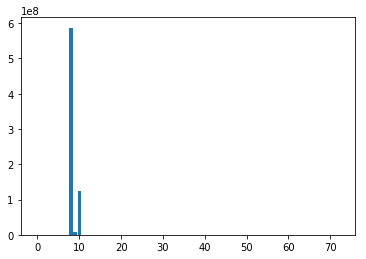

In [83]:
def select_features(X, Y, X1):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X, Y)
	X_fs = fs.transform(X)
	X1_fs = fs.transform(X1)
	return X_fs, X1_fs, fs
 

X_fs, X1_fs, fs = select_features(X, Y, X1)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [84]:
l= []
for i in range(len(fs.scores_)):
    if fs.scores_[i] >5:
        l.append(i)

In [85]:
lis= df_train_copy.iloc[:,l].columns
kbestdf= df_train_copy[lis]

In [86]:
lis1= df_test_copy.iloc[:,l].columns
kbesttestdf= df_test_copy[lis1]

In [87]:
x_best_train= kbestdf.drop('Income',axis=1)
y_best_train= kbestdf['Income']
x_best_test=kbesttestdf.drop('Income',axis=1)
y_best_test= kbesttestdf['Income']

In [88]:
seed= 0
lr= LogisticRegression(max_iter=15000, random_state=seed)
RF= RandomForestClassifier(random_state=seed)
dt= DecisionTreeClassifier(random_state=seed)
bg= BaggingClassifier(random_state=seed)
adb= AdaBoostClassifier(random_state=seed)
xgb= XGBClassifier(random_state=seed)

models=[lr,RF, dt, adb, xgb, bg]

def score_ensemble_model(xtrain,ytrain,xtest,ytest):
    mod_columns=[]
    mod=pd.DataFrame(columns=mod_columns)
    i=0
    #read model one by one
    for model in models:
        model.fit(xtrain,ytrain)
        y_pred=model.predict(xtest)
        
        #compute metrics
        train_accuracy=model.score(xtrain,ytrain)
        test_accuracy=model.score(xtest,ytest)
        
        p_score=metrics.precision_score(ytest,y_pred)
        r_score=metrics.recall_score(ytest,y_pred)
        f1_score=metrics.f1_score(ytest,y_pred)
        # calculate the fpr and tpr for all thresholds of the classification
        probs = model.predict_proba(xtest)
        preds = probs[:,1]
        fp, tp, th = metrics.roc_curve(ytest, preds)
        
        #insert in dataframe
        mod.loc[i,"Model_Name"]=model.__class__.__name__
        mod.loc[i,"Precision"]=round(p_score,2)
        mod.loc[i,"Recall"]=round(r_score,2)
        mod.loc[i,"Train_Accuracy"]=round(train_accuracy,2)
        mod.loc[i,"Test_Accuracy"]=round(test_accuracy,2)
        mod.loc[i,"F1_Score"]=round(f1_score,2)
        mod.loc[i,'AUC'] = metrics.auc(fp, tp)
        
        i+=1
    
    #sort values by accuracy
    mod.sort_values(by=['AUC'],ascending=False,inplace=True)
    return(mod)

report=score_ensemble_model(x_best_train, y_best_train, x_best_test, y_best_test)
report

,Model_Name,Precision,Recall,Train_Accuracy,Test_Accuracy,F1_Score,AUC
4,XGBClassifier,0.75,0.49,0.96,0.96,0.59,0.955835
3,AdaBoostClassifier,0.71,0.41,0.95,0.95,0.52,0.944754
1,RandomForestClassifier,0.73,0.44,1.00,0.96,0.55,0.938390
0,LogisticRegression,0.70,0.34,0.95,0.95,0.46,0.934783
5,BaggingClassifier,0.67,0.45,0.99,0.95,0.54,0.891336
2,DecisionTreeClassifier,0.46,0.49,1.00,0.93,0.48,0.726719


# Scale and transform:

In [89]:
df_train_copy = train.copy()

transform= ['Age', 'capital gains', 'capital losses', 'dividends from stocks']

for i in transform:
    df_train[i] = np.log1p(train[i])

    
scale = ['Age','capital gains','capital losses','dividends from stocks','Worker_Class','detailed industry recode',
         'detailed occupation recode','education','wage per hour','full or part time employment stat',
         'state of previous residence','num persons worked for employer','own business or self employed',
         'veterans benefits','weeks worked in year','year']

df_train_scaled=df_train[scale].copy()


sc= StandardScaler()
df_train_std =pd.DataFrame(sc.fit_transform(df_train_scaled) ,columns=scale)

df_train.drop(scale,axis=1,inplace=True)


train_scale =pd.concat([df_train_std.reset_index(drop=True), df_train.reset_index(drop=True)],axis=1)

In [90]:
df_test_copy = test.copy()

for i in transform:
    df_test[i] = np.log1p(test[i])

# df_test_transform= pd.concat([test_transf.reset_index(drop= True), test_le_dummies.reset_index(drop= True)], axis=1)


df_test_scaled=df_test[scale]


df_test_std =pd.DataFrame(sc.transform(df_test_scaled) , columns=scale)

df_test.drop(scale,axis=1,inplace=True)


test_scale =pd.concat([df_test_std.reset_index(drop=True), df_test.reset_index(drop=True)],axis=1)

In [91]:
x_train = train_scale.drop('Income', axis=1)
y_train = train_scale['Income']

x_test=test_scale.drop('Income',axis=1)
y_test=test_scale['Income']

In [92]:
seed= 0
lr= LogisticRegression(max_iter=15000, random_state=seed)
RF= RandomForestClassifier(random_state=seed)
dt= DecisionTreeClassifier(random_state=seed)
bg= BaggingClassifier(random_state=seed)
adb= AdaBoostClassifier(random_state=seed)
xgb= XGBClassifier(random_state=seed)

models=[lr,RF, dt, adb, xgb, bg]

def score_ensemble_model(xtrain,ytrain,xtest,ytest):
    mod_columns=[]
    mod=pd.DataFrame(columns=mod_columns)
    i=0
    #read model one by one
    for model in models:
        model.fit(xtrain,ytrain)
        y_pred=model.predict(xtest)
        
        #compute metrics
        train_accuracy=model.score(xtrain,ytrain)
        test_accuracy=model.score(xtest,ytest)
        
        p_score=metrics.precision_score(ytest,y_pred)
        r_score=metrics.recall_score(ytest,y_pred)
        f1_score=metrics.f1_score(ytest,y_pred)
        # calculate the fpr and tpr for all thresholds of the classification
        probs = model.predict_proba(xtest)
        preds = probs[:,1]
        fp, tp, th = metrics.roc_curve(ytest, preds)
        
        #insert in dataframe
        mod.loc[i,"Model_Name"]=model.__class__.__name__
        mod.loc[i,"Precision"]=round(p_score,2)
        mod.loc[i,"Recall"]=round(r_score,2)
        mod.loc[i,"Train_Accuracy"]=round(train_accuracy,2)
        mod.loc[i,"Test_Accuracy"]=round(test_accuracy,2)
        mod.loc[i,"F1_Score"]=round(f1_score,2)
        mod.loc[i,'AUC'] = metrics.auc(fp, tp)
        
        i+=1
    
    #sort values by accuracy
    mod.sort_values(by=['AUC'],ascending=False,inplace=True)
    return(mod)

manualLE_dummies_report=score_ensemble_model(x_train,y_train,x_test,y_test)
manualLE_dummies_report

,Model_Name,Precision,Recall,Train_Accuracy,Test_Accuracy,F1_Score,AUC
4,XGBClassifier,0.75,0.49,0.96,0.96,0.59,0.956604
3,AdaBoostClassifier,0.72,0.39,0.95,0.95,0.50,0.944843
0,LogisticRegression,0.68,0.35,0.95,0.95,0.46,0.938130
1,RandomForestClassifier,0.73,0.43,1.00,0.96,0.55,0.937410
5,BaggingClassifier,0.67,0.44,0.99,0.95,0.53,0.893518
2,DecisionTreeClassifier,0.46,0.50,1.00,0.93,0.48,0.731091


## Final model

##  k- fold cross validaion

In [110]:
from sklearn import model_selection

  name     bias      variance
Log_reg  : 0.064109 (0.000007)
Dec_Tree : 0.279763 (0.000019)
RanForest: 0.063711 (0.000010)
Bagging  : 0.112176 (0.000019)
adaboost : 0.056425 (0.000007)
XGBoost  : 0.046334 (0.000005)


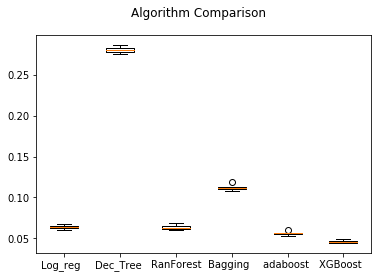

In [111]:
# evaluate each model in turn

X = df_train_copy.drop('Income', axis=1)
Y = df_train_copy['Income']

results = []
names = []
seed= 0
lr= LogisticRegression(max_iter=15000, random_state=seed)
RF= RandomForestClassifier(random_state=seed)
dt= DecisionTreeClassifier(random_state=seed)
bg= BaggingClassifier(random_state=seed)
adb= AdaBoostClassifier(random_state=seed)
xgb= XGBClassifier(random_state=seed)
print('  name  ','  bias  ','   variance')

models = []
models.append(('Log_reg  ', lr ))
models.append(('Dec_Tree ', dt ))
models.append(('RanForest', RF ))
models.append(('Bagging  ', bg ))
models.append(('adaboost ', adb))
models.append(('XGBoost  ', xgb))


for name, model in models:
    kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, 1- np.mean(cv_results),np.var(cv_results,ddof=1)))
    

# bias calculation
bias= []
for i in list(results):
    bias.append(1- i)


# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(bias)
ax.set_xticklabels(names)
plt.show()

In [116]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import model_selection
# from sklearn import metrics

X_scaled = train_scale.drop('Income', axis=1)
Y_scaled = train_scale['Income']

xgb= XGBClassifier(random_state=0)

# evaluate each model in turn
results_scaled = []
names = []

models = []
models.append(('XGB', xgb))

for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
	cv_results_scaled = model_selection.cross_val_score(model, X_scaled, Y_scaled,cv=kfold, scoring='roc_auc')
	results_scaled.append(cv_results_scaled)
	names.append(name)
	print("%s: %f (%f)" % (name, 1- np.mean(cv_results_scaled),np.var(cv_results_scaled,ddof=1)))

#bias_scaled calculation
bias_scaled= []
for i in list(results_scaled):
    bias_scaled.append(1- i) 
        
print(bias_scaled)   


XGB: 0.046389 (0.000005)
[array([0.04992608, 0.04551299, 0.04472123, 0.04708665, 0.04469978])]


In [117]:
x_train = df_train.drop('Income', axis=1)
y_train = df_train['Income']


xgb= XGBClassifier(random_state=0)

# evaluate each model in turn
result_combo = []
names = []

models = []
models.append(('XGB_Combo', xgb))

for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
	cv_result_combo = model_selection.cross_val_score(model, x_train, y_train,cv=kfold, scoring='roc_auc')
	result_combo.append(cv_result_combo)
	names.append(name)
	print("%s: %f (%f)" % (name, 1- np.mean(cv_result_combo),np.var(cv_result_combo,ddof=1)))


# bias_combo calculation
bias_combo= []
for i in list(result_combo):
    bias_combo.append(1- i) 
        
print(bias_combo)

XGB_Combo: 0.046334 (0.000005)
[array([0.04992524, 0.04549319, 0.04472175, 0.04708008, 0.04445124])]


In [118]:
xgb= XGBClassifier(**xgb_grid.best_params_, random_state=0)

# evaluate each model in turn
resultxgb_tuned = []
names = []

models = []
models.append(('XGB_tuned', xgb))

for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
	cv_resultxgb_tuned = model_selection.cross_val_score(xgb, x_train, y_train, cv=kfold, scoring='roc_auc')
	resultxgb_tuned.append(cv_resultxgb_tuned)
	names.append(name)
	print("%s: %f (%f)" % (name, 1- np.mean(cv_resultxgb_tuned),np.var(cv_resultxgb_tuned,ddof=1)))

#bias1 calculation
bias_tuned= []
for i in list(resultxgb_tuned):
    bias_tuned.append(1- i) 
       

XGB_tuned: 0.045467 (0.000004)


In [120]:
bias_scaled1=bias_scaled.copy()

In [121]:
bias_scaled.append(bias_combo)
bias_scaled.append(bias_tuned)
bias_scaled

[array([0.04992608, 0.04551299, 0.04472123, 0.04708665, 0.04469978]),
 [array([0.04992524, 0.04549319, 0.04472175, 0.04708008, 0.04445124])],
 [array([0.04849897, 0.04519324, 0.04381402, 0.04618341, 0.0436456 ])]]

		 Model_name         bias               variance
		 XGB_Scaled: 0.04638934588976773 4.849994383122655e-06
		 XGB_Comb  : 0.046334299173164895 5.076177170077357e-06
		 XGB_tuned : 0.04546704879006036 3.95771361499937e-06


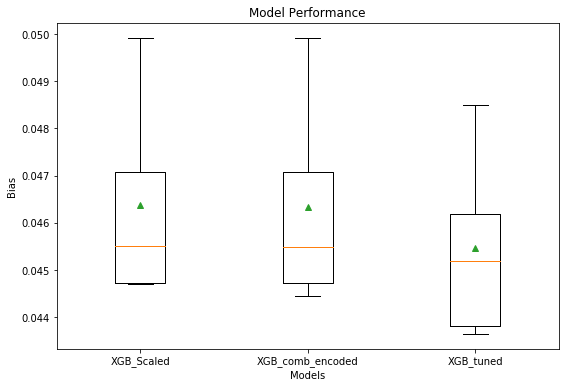

In [122]:
names_of_models= ['XGB_Scaled', 'XGB_comb_encoded', 'XGB_tuned']
print('\t\t','Model_name', '        bias', '              variance')
print('\t\t','XGB_Scaled:', 1- np.mean(cv_results_scaled),np.var(cv_results_scaled,ddof=1))
print('\t\t','XGB_Comb  :',1- np.mean(cv_result_combo),np.var(cv_result_combo,ddof=1))
print('\t\t','XGB_tuned :', 1- np.mean(cv_resultxgb_tuned), np.var(cv_resultxgb_tuned,ddof=1))


plt.figure(figsize=(9,6))
plt.boxplot(bias_scaled, labels = names_of_models, showmeans=True)
plt.xticks()
plt.ylabel("Bias")
plt.xlabel("Models")
plt.title("Model Performance")
plt.show()

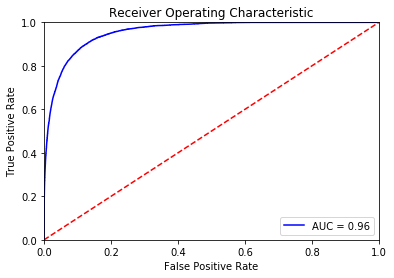

In [127]:
# calculate the fpr and tpr for all thresholds of the classification
x_train = df_train_copy.drop('Income', axis=1)
y_train = df_train_copy['Income']
x_test = df_test.drop('Income', axis=1)
y_test = df_test['Income'] 


xgb= XGBClassifier(**xgb_grid.best_params_, random_state=0)
xgb.fit(x_train, y_train)

probs = xgb.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


[[92645   931]
 [ 3227  2959]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     93576
           1       0.76      0.48      0.59      6186

    accuracy                           0.96     99762
   macro avg       0.86      0.73      0.78     99762
weighted avg       0.95      0.96      0.95     99762



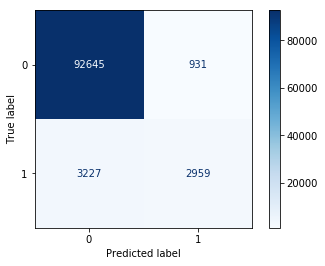

In [132]:
# Evaluation metrics for XGB tuned

y_pred=  xgb.predict(x_test)

print(confusion_matrix(y_test, y_pred))
      
print(classification_report(y_test, y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb, x_test, y_test, cmap='Blues', values_format='.0f')

# Confidence Interval

In [128]:
from sklearn.model_selection import cross_val_score

In [129]:
scores = cross_val_score(xgb, x_train, y_train, cv=15, scoring='f1')

print("F1_Score:" , scores.mean(),"(+/-", scores.std()*2,')')

F1_Score: 0.5890189036145678 (+/- 0.027328585775714346 )


In [130]:
scores = cross_val_score(xgb, x_train, y_train, cv=15)

print("accuracy:" , scores.mean(),"(+/-", scores.std()*2,')')

accuracy: 0.9583203637852756 (+/- 0.002448537056756233 )


In [131]:
scores = cross_val_score(xgb, x_train, y_train, cv=15, scoring='roc_auc')

print("roc_auc:" , scores.mean(),"(+/-", scores.std()*2,')')

roc_auc: 0.9550361051696938 (+/- 0.006640288431344191 )
